<a href="https://colab.research.google.com/github/Lonergun141/Womens_Clothing_Reviews_NLP.ipynb-or-Sentiment_Analysis_Prep/blob/main/Womens_Clothing_Reviews_NLP_ipynb_or_Sentiment_Analysis_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Load Data
file_path = '/content/sample_data/Womens Clothing E-Commerce Reviews.csv'
data = pd.read_csv(file_path, nrows=5000)
data = data[['Review Text', 'Recommended IND']].dropna()

data.head(10)

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
5,"I love tracy reese dresses, but this one is no...",0
6,I aded this in my basket at hte last mintue to...,1
7,"I ordered this in carbon for store pick up, an...",1
8,I love this dress. i usually get an xs but it ...,1
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1


Recommended IND
1    3950
0     871
Name: count, dtype: int64


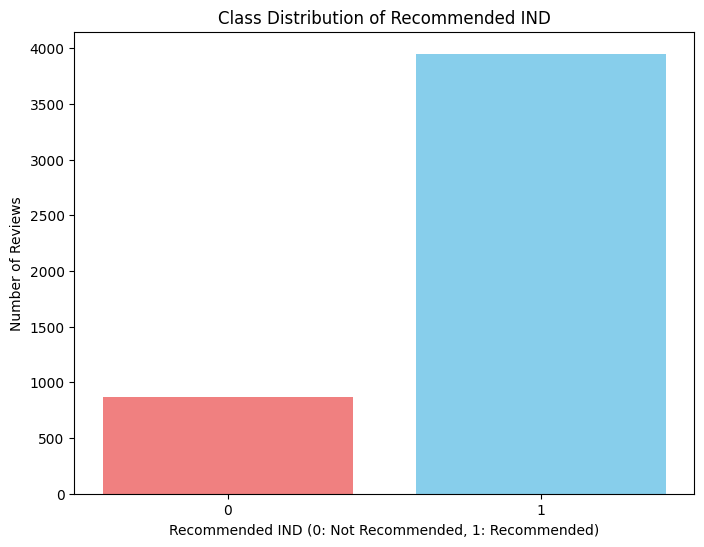

In [ ]:
# Step 2: EDA - Class Distribution
class_counts = data['Recommended IND'].value_counts()
print(class_counts)

# Step 3: Visualization
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Class Distribution of Recommended IND')
plt.xlabel('Recommended IND (0: Not Recommended, 1: Recommended)')
plt.ylabel('Number of Reviews')
plt.xticks(class_counts.index)
plt.show()

In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=62977fd763d326bacc07f1c56927a9a75fad9d2c5381b250453f1c327915277d
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Step 2: Text Normalization Imports
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from autocorrect import Speller
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**STEP 3: Text Normalization**

In [ ]:
# Initialize tools
spell = Speller(lang='en')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def lowercase_text(text):
    return text.lower()

In [ ]:
def fix_contractions(text):
    """
    Expand contractions using the contractions library
    and normalize symbols like ' and ".
    """
    # Replace unusual apostrophes or quotes with standard ones
    text = re.sub(r"[‘’`']", "'", text)  # Standardize apostrophes
    text = re.sub(r'[“”"]', '"', text)   # Standardize double quotes

    # Expand contractions
    return contractions.fix(text)

In [ ]:
def remove_special_symbols(text):
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    return re.sub(r"\s+", " ", text).strip()


In [ ]:
def remove_repeated_characters(word):
    """Reduce repeating characters but verify validity using WordNet."""
    pattern = re.compile(r'(\w)\1{2,}')  # Match 3+ repeating characters
    fixed_word = re.sub(pattern, r'\1\1', word)  # Reduce to 2 repetitions
    return fixed_word if wordnet.synsets(fixed_word) else word

In [ ]:
def tokenize_and_clean(text):
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = []

    for word in tokens:
        # Step 5.1: Remove repeated characters
        word = remove_repeated_characters(word)

        # Step 5.2: Correct spelling
        word = spell(word)

        # Step 5.3: Remove stopwords and lemmatize
        if word not in stop_words and word.isalpha():
            word = lemmatizer.lemmatize(word)
            cleaned_tokens.append(word)

    return " ".join(cleaned_tokens)

In [ ]:
def preprocess_text_pipeline(text):
    print("Original Text:")
    print(text)
    print("-" * 80)

    # Step 1: Lowercasing
    text = lowercase_text(text)
    print("After Lowercasing:")
    print(text)
    print("-" * 80)

    # Step 2: Fix Contractions
    text = fix_contractions(text)
    print("After Fixing Contractions:")
    print(text)
    print("-" * 80)

    # Step 3: Remove Special Symbols
    text = remove_special_symbols(text)
    print("After Removing Special Symbols:")
    print(text)
    print("-" * 80)

    # Step 4: Tokenize, Clean Repeats, Correct Spelling, Lemmatize
    text = tokenize_and_clean(text)
    print("After Tokenization, Spell Correction, and Lemmatization:")
    print(text)
    print("=" * 80)

    return text

In [ ]:
# Show the first 100 rows
data_subset = data.head(100)

# Preprocess the entire dataset
data['Cleaned Review Text'] = data['Review Text'].apply(preprocess_text_pipeline)


Streaming output truncated to the last 5000 lines.
this top is even more beautiful and vibrant in person, but you definitely need a racerback cami underneath it as the laser cuts are big. the first time i wore it today, i got a number of compliments. a definite keeper.
--------------------------------------------------------------------------------
After Removing Special Symbols:
this top is even more beautiful and vibrant in person but you definitely need a racerback cami underneath it as the laser cuts are big the first time i wore it today i got a number of compliments a definite keeper
--------------------------------------------------------------------------------
After Tokenization, Spell Correction, and Lemmatization:
top even beautiful vibrant person definitely need paperback came underneath laser cut big first time wore today got number compliment definite keeper
Original Text:
Cute top. fits short but roomy. will get a lot of use in my wardrobe.
------------------------------

In [ ]:
# # Step 3: Text Normalization Function

# def fix_contractions(text):
#     """
#     Expand contractions using the contractions library
#     and normalize symbols like ' and ".
#     """
#     # Replace unusual apostrophes or quotes with standard ones
#     text = re.sub(r"[‘’`']", "'", text)  # Standardize apostrophes
#     text = re.sub(r'[“”"]', '"', text)   # Standardize double quotes

#     # Expand contractions
#     return contractions.fix(text)

# # Step 2: Remove Repeated Characters
# def remove_repeated_characters(word):
#     """Reduce repeating characters but verify validity using WordNet."""
#     pattern = re.compile(r'(\w)\1{2,}')  # Match 3+ repeating characters
#     fixed_word = re.sub(pattern, r'\1\1', word)  # Reduce to 2 repetitions
#     return fixed_word if wordnet.synsets(fixed_word) else word

# # Step 3: Full Preprocessing Function
# def preprocess_text(text):
#     """
#     Full pipeline: Lowercase, fix contractions, clean symbols, handle repeats,
#     correct spelling, remove stopwords, and lemmatize.
#     """
#     # Lowercasing
#     text = text.lower()

#     # Expand contractions
#     text = fix_contractions(text)

#     # Remove special symbols (retain only letters, spaces, and digits)
#     text = re.sub(r"[^a-zA-Z\s]", " ", text)
#     text = re.sub(r"\s+", " ", text).strip()

#     # Tokenization
#     tokens = nltk.word_tokenize(text)

#     cleaned_tokens = []
#     for word in tokens:
#         # Remove repeated characters
#         word = remove_repeated_characters(word)

#         # Correct spelling
#         word = spell(word)

#         # Stopword removal and lemmatization
#         if word not in stop_words and word.isalpha():
#             word = lemmatizer.lemmatize(word)
#             cleaned_tokens.append(word)

#     return " ".join(cleaned_tokens)

# # Step 4: Apply Preprocessing
# data['Cleaned Review Text'] = data['Review Text'].apply(preprocess_text)



In [ ]:
# # Step 5: Display Comparison
# for index, row in data.head(150).iterrows():
#     print(f"Original Text:\n{row['Review Text']}")
#     print(f"Cleaned Text:\n{row['Cleaned Review Text']}")
#     print('-' * 280)

Original Text:
Absolutely wonderful - silky and sexy and comfortable
Cleaned Text:
absolutely wonderful silky sexy comfortable
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Original Text:
Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
Cleaned Text:
love dress soon pretty happened find store glad never would ordered online petite bought petite love length hit little knee would definitely true midi someone truly petite
---------------------------------------------------------------------------------------

In [ ]:
# Step 6: Train-Test Split
X = data['Cleaned Review Text']
y = data['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 7: Feature Extraction - Bag of Words
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=1)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train_vect, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.8860

Classification Report:
Class 0:
  Precision: 0.7528, Recall: 0.5255, F1-Score: 0.6189
Class 1:
  Precision: 0.9046, Recall: 0.9631, F1-Score: 0.9330
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

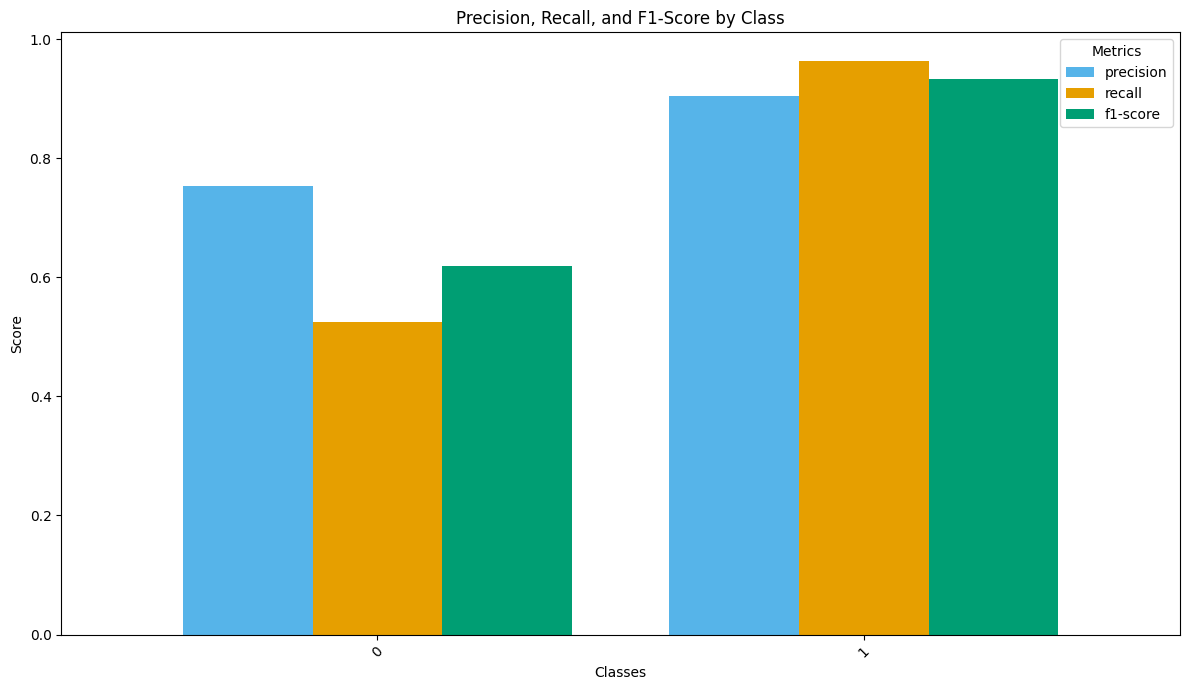

In [ ]:
# Step 9: Evaluation
y_pred = model.predict(X_test_vect)
accuracy = classification_report(y_test, y_pred, output_dict=True)

# Print the Accuracy and Classification Report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
for label, metrics in accuracy.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class {label}:")
        print(f"  Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-Score: {metrics['f1-score']:.4f}")
print("-" * 50)

# Convert classification report into a pandas DataFrame for easier visualization
report_df = pd.DataFrame(accuracy).transpose()

# Filter out unwanted rows like 'accuracy', 'macro avg', 'weighted avg'
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
report_df = report_df[metrics]

# Plot the data as a bar plot
report_df.plot(kind='bar', figsize=(12, 7), width=0.8, color=['#56B4E9', '#E69F00', '#009E73'])

# Add labels and title
plt.title('Precision, Recall, and F1-Score by Class')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Show plot
plt.tight_layout()
plt.show()

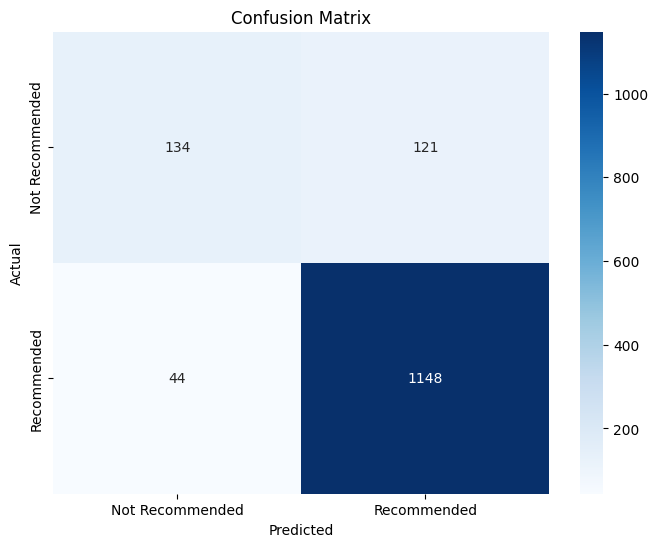

In [ ]:
# Step 10: Confusion Matrix


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



* True Negatives (134): Correctly predicted "Not Recommended."
* False Positives (121): Predicted "Recommended" but was actually "Not Recommended."
* False Negatives (44): Predicted "Not Recommended" but was actually "Recommended."
* True Positives (1148): Correctly predicted "Recommended."

